## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

### Goals of the Case Study

There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### 1. Reading and Understanding the data

In [518]:
# Disabling warnings

import warnings
warnings.filterwarnings('ignore')

In [519]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [520]:
# Loading the dataset

leads = pd.read_csv('Leads.csv')

In [521]:
# Loading first 5 rows of the dataset

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [522]:
# checking the number of rows and columns of the dataset

print("Rows {0} \nColumns {1}".format(leads.shape[0], leads.shape[1]))

Rows 9240 
Columns 37


In [523]:
# checking the data types present in of various columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [524]:
# statistics of numeric columns

leads.describe(percentiles = [.25, .50, .75, .90, .99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,650506.1,659592.98,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,7.0,17.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,1380.0,1840.61,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,5.0,9.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,16.0,17.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,19.0,20.00,20.0


From the above statistics, we can see high variance in 'Total Time Spet on Website' and 'Page Views Per Visit' at 90%ile, 99%ile and beyond 99%ile.

In [525]:
# current conversation rate

convertion_rate_curr = leads.Converted.mean()*100
round(convertion_rate_curr,2)

38.54

Current Convertion Rate stands at 38.54% i.e. approximately 39%.

### 2a. Data Preparation

In [526]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [527]:
# Let's check values under all the varibales

vars = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

for i in leads[vars]:
    print('\n' + i)
    print('-'*30)
    print(leads[vars][i].value_counts())


Lead Origin
------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source
------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Do Not Email
------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64

Do Not Call
---------------------------

We do see a lot of columns which have **_Select_** as the value. While selecting options from a dropdown, value **_Select_** is the default option incase the user does not select any other value. Hence, it can be treated as missing or null value. 

In [528]:
# Replacing "Select" with NaN

leads.replace("Select", np.nan, inplace=True)

In [529]:
# checking duplicates in Prospect ID and Lead Number

leads['Prospect ID'].nunique()

9240

In [530]:
leads['Lead Number'].nunique()

9240

Both Prospect ID and Lead Number have unique values which implies that all prospective leads are unique.

In [531]:
# we do not need 'Prospect ID', 'Lead Number' and hence it is safe to just drop them:

leads.drop(['Prospect ID', 'Lead Number'], axis =1, inplace = True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [532]:
# Missing values

null_col_leads = leads.isnull().mean()*100
null_col_leads.sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

The column 'How did you hear about X Education' had highest amount of Select as value which was converted to Null value in the previous operation and hence we see a very high %age of missing value standing at 78.46%. 

In [533]:
# From the above output, we can see that there are columns which have a very high percentage of null values. 


high_null_col_leads = null_col_leads[null_col_leads.values>45]
print("Description of columns containing more than 45% of null values: ")
print('')
print(high_null_col_leads.sort_values(ascending = False))
print('')
print("Number of such high null columns: {}".format(len(high_null_col_leads)))

Description of columns containing more than 45% of null values: 

How did you hear about X Education    78.463203
Lead Profile                          74.188312
Lead Quality                          51.590909
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

Number of such high null columns: 7


There are 7 such columns that have null values greater than 45%. Considering the magnitude of %age of null values, it is safe to drop them.

In [534]:
high_null_col_leads_list = list(null_col_leads[null_col_leads.values>45].index)
leads.drop(labels = high_null_col_leads_list, axis = 1, inplace = True)
leads.shape

(9240, 28)

We have dropped 7 columns from our DataFrame and now we are left with 28 columns.

In [535]:
# Again accounting for any missing values

null_col_leads = leads.isnull().mean()*100
null_col_leads.sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

### 2b. Data Imputation

In [536]:
# From the above output, we can see that there are columns which majorly have a low percentage of null values. 

low_null_col_leads = null_col_leads[(null_col_leads.values<50) & (null_col_leads.values>0)]
print("Description of columns containing less than 50% of null values: ")
print('')
print(low_null_col_leads.sort_values(ascending = False))
print('')
print("Number of such low null columns: {}".format(len(low_null_col_leads)))

Description of columns containing less than 50% of null values: 

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

Number of such low null columns: 10


**Let's begin with the process of appropriate data imputation column by column**

In [537]:
# City

leads.City.value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

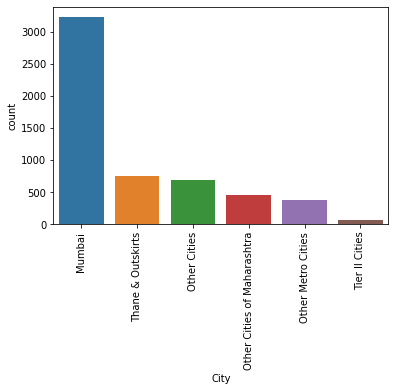

In [538]:
sns.countplot(x = 'City',
              data = leads,
              order = leads['City'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [539]:
# Imputing the null values in the City Column with 'Mumbai' since with above operation, we know that Mumbai has the maximum count of leads which far outweighs other values:

leads.City = leads.City.replace(np.nan, 'Mumbai')
leads.City.value_counts(dropna = False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [540]:
# Specialization

leads.Specialization.value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

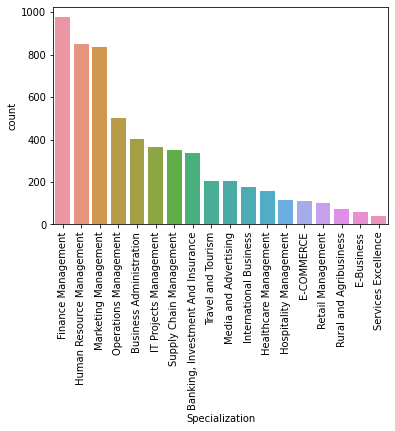

In [541]:
sns.countplot(x = 'Specialization',
              data = leads,
              order = leads['Specialization'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [542]:
# From the above, we see that there is not one value which outweighs all the other values which could be used to impute NaN values, so we should just impute it with 'Other Specialization'

leads.Specialization = leads.Specialization.replace(np.nan, 'Other Specialization')
leads.Specialization.value_counts(dropna = False)

Other Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [543]:
# group all the management related specializations:

leads.Specialization = leads.Specialization.replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management' ], 'Management Specialization')
leads.Specialization.value_counts(dropna = False)

Management Specialization            4253
Other Specialization                 3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [544]:
# Tags

leads.Tags.value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

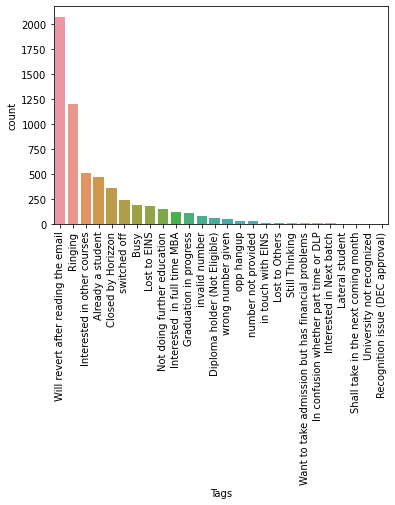

In [545]:
sns.countplot(x = 'Tags',
              data = leads,
              order = leads['Tags'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [546]:
# Imputing the null values in the Tags Column with 'Not Specified'.

leads.Tags = leads.Tags.replace(np.nan, 'Not Specified')
leads.Tags.value_counts(dropna = False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [547]:
# What matters most to you in choosing a course 

leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

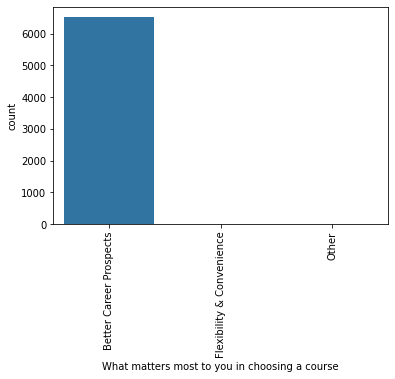

In [548]:
sns.countplot(x = 'What matters most to you in choosing a course',
              data = leads,
              order = leads['What matters most to you in choosing a course'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [549]:
# Imputing the null values in the 'What matters most to you in choosing a course' Column with 'Better Career Prospects'.

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [550]:
# Drop the Better Career Prospects as this has no effect on the model.

leads.drop('What matters most to you in choosing a course', axis =1, inplace = True)

In [551]:
# current occupation 

leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

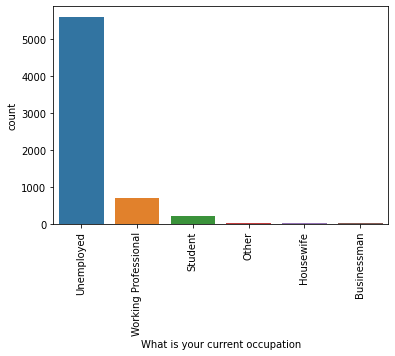

In [552]:
sns.countplot(x = 'What is your current occupation',
              data = leads,
              order = leads['What is your current occupation'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [553]:
# Imputing the null values in the 'What is your current occupation' Column with 'Unemployed'.

leads['What is your current occupation']= leads['What is your current occupation'].replace(np.nan, 'Unemployed')
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [554]:
# Country

leads.Country.value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

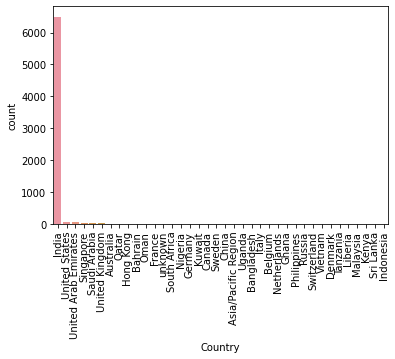

In [555]:
sns.countplot(x = 'Country',
              data = leads,
              order = leads['Country'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [556]:
# Imputing the null values in the Country Column with 'India'.
leads.Country = leads.Country.replace(np.nan, 'India')
leads.Country.value_counts(dropna = False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [557]:
# India is practically far outweighs other values owing to its count and hence will not influence the model and hence we can choose to drop it:

leads.drop('Country', axis =1, inplace = True)

In [558]:
null_col_leads = leads.isnull().mean()*100
null_col_leads.sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Lead Origin                                 0.000000
Newspaper                                   0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Magazine                                    0.000000
Search                                      0.

In [559]:
# imputed values for most of the missig values

low_null_col_leads = null_col_leads[(null_col_leads.values<50) & (null_col_leads.values>0)]
print("Description of columns containing less than 50% of null values: ")
print('')
print(low_null_col_leads.sort_values(ascending = False))
print('')
print("Number of such low null columns: {}".format(len(low_null_col_leads)))

Description of columns containing less than 50% of null values: 

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

Number of such low null columns: 4


In [560]:
# Remove the rows that have NaN values:

leads.dropna(inplace = True)

In [561]:
# Final check for any missing values

null_col_leads = leads.isnull().mean()*100
null_col_leads.sort_values(ascending = False)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

With the above operations, **We have imputed/removed all missing values**.

In [562]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  What is your current occupation     

In [563]:
# Looking at the number of rows and columns of the dataset

print("Rows: {0} \nColumns: {1}".format(leads.shape[0], leads.shape[1]))

Rows: 9074 
Columns: 26


At the beginning of loading the dataset, we had started out with **9240 rows and 37 columns** and now we are down to **9074 rows and 26 columns**.

### 3. Outlier Analysis and Treatment

In [564]:
leads.describe(percentiles = [.25, .5, .75, .9, .99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
Converted,9074.0,0.378554,0.485053,0.0,0.0,0.0,1.00,1.0,1.0,1.0
TotalVisits,9074.0,3.456028,4.858802,0.0,1.0,3.0,5.00,7.0,17.0,251.0
Total Time Spent on Website,9074.0,482.887481,545.256560,0.0,11.0,246.0,922.75,1373.0,1839.0,2272.0
Page Views Per Visit,9074.0,2.370151,2.160871,0.0,1.0,2.0,3.20,5.0,9.0,55.0


From the above operation, we have outliers for TotalVisits, Total Time Spent on Website, Page Views Per Visit. Let's dive deeper into them.

In [565]:
# TotalVisits

leads.TotalVisits.describe(percentiles = [.25, .5, .75, .9, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

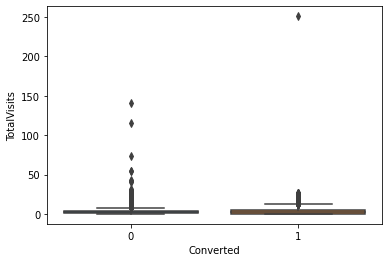

In [566]:
# Pre-outlier treatment boxplot

sns.boxplot(x = 'Converted',y = 'TotalVisits', data = leads)
plt.show()

In [567]:
# After removing outlier from 100% percentile

leads = leads[leads['TotalVisits'] <= 17]
leads.TotalVisits.describe(percentiles = [.25, .5, .75, .9, .99])

count    8991.000000
mean        3.217106
std         2.989530
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        14.000000
max        17.000000
Name: TotalVisits, dtype: float64

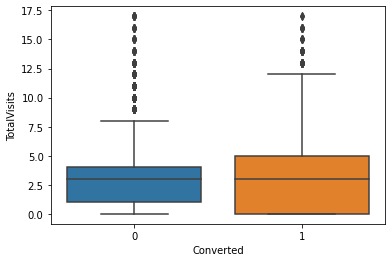

In [568]:
# Post-outlier treatment boxplot

sns.boxplot(x = 'Converted',y = 'TotalVisits', data = leads)
plt.show()

In [569]:
# Total Time Spent on Website

leads['Total Time Spent on Website'].describe(percentiles = [.25, .5, .75, .9, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

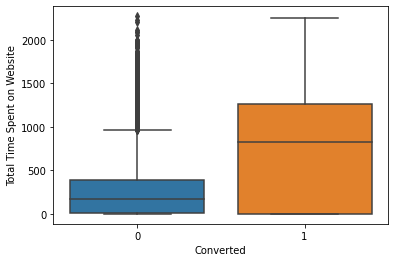

In [570]:
sns.boxplot(x = 'Converted',y = 'Total Time Spent on Website', data = leads)
plt.show()

We do not see very high variance between the 99%ile and 100%ile and hence we will not perform outlier treatment for Total Time Spent on Website.

In [571]:
# Page Views Per Visit

leads['Page Views Per Visit'].describe(percentiles = [.25, .5, .75, .9, .99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

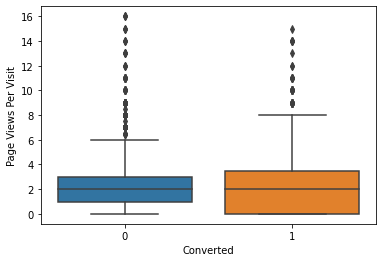

In [572]:
# Pre-outlier treatment boxplot


sns.boxplot(x = 'Converted',y = 'Page Views Per Visit', data = leads)
plt.show()

In [573]:
# After removing outlier from 100% percentile

leads = leads[leads['Page Views Per Visit'] <= 9]
leads['Page Views Per Visit'].describe(percentiles = [.25, .5, .75, .9, .99])

count    8924.00000
mean        2.27400
std         1.89403
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
90%         5.00000
99%         8.00000
max         9.00000
Name: Page Views Per Visit, dtype: float64

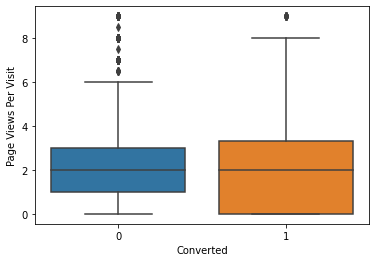

In [574]:
# Post-outlier treatment boxplot

sns.boxplot(x = 'Converted',y = 'Page Views Per Visit', data = leads)
plt.show()

In [575]:
# Checking outlier treatment:

leads.describe(percentiles = [.25, .5, .75, .9, .99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
Converted,8924.0,0.377521,0.484794,0.0,0.0,0.0,1.0,1.0,1.00,1.0
TotalVisits,8924.0,3.153070,2.903138,0.0,1.0,3.0,5.0,7.0,13.00,17.0
Total Time Spent on Website,8924.0,479.287875,544.381711,0.0,7.0,242.0,914.0,1371.0,1838.54,2272.0
Page Views Per Visit,8924.0,2.274000,1.894030,0.0,1.0,2.0,3.0,5.0,8.00,9.0


It is evident from the statistics that we have taken care of the outliers.

In [576]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               8924 non-null   object 
 1   Lead Source                               8924 non-null   object 
 2   Do Not Email                              8924 non-null   object 
 3   Do Not Call                               8924 non-null   object 
 4   Converted                                 8924 non-null   int64  
 5   TotalVisits                               8924 non-null   float64
 6   Total Time Spent on Website               8924 non-null   int64  
 7   Page Views Per Visit                      8924 non-null   float64
 8   Last Activity                             8924 non-null   object 
 9   Specialization                            8924 non-null   object 
 10  What is your current occupation     

### 4. Variable Preprocessing

In [577]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [578]:
# Drop the variables which have high class imbalance:


vars = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

for i in leads[vars]:
    print('\n' + i)
    print('-'*30)
    print(leads[vars][i].value_counts())


Lead Origin
------------------------------
Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64

Lead Source
------------------------------
Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Do Not Email
------------------------------
No     8235
Yes     689
Name: Do Not Email, dtype: int64

Do Not Call
------------------------------
No     8922
Yes       2
Name

In [579]:
leads.drop(['Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
        'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [580]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8924 non-null   object 
 1   Lead Source                             8924 non-null   object 
 2   Do Not Email                            8924 non-null   object 
 3   Converted                               8924 non-null   int64  
 4   TotalVisits                             8924 non-null   float64
 5   Total Time Spent on Website             8924 non-null   int64  
 6   Page Views Per Visit                    8924 non-null   float64
 7   Last Activity                           8924 non-null   object 
 8   Specialization                          8924 non-null   object 
 9   What is your current occupation         8924 non-null   object 
 10  Tags                                    8924 non-null   obje

**Let's us look at values of all remaining columns, column-by-column, and let's see if we can group a few values under one heading**

In [581]:
# Lead Origin

leads['Lead Origin'].value_counts(ascending = False)

Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64

In [582]:
# Lead Source

leads['Lead Source'].value_counts(ascending = False)

Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [583]:
# Few heading can be clubbed under one:

leads['Lead Source'] = leads['Lead Source'].replace(['Google', 'google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook', 'Social Media') 
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'Click2call', 'Live Chat', 'welearnblog_Home', 'Pay per Click Ads', 'WeLearn', 'NC_EDM', 'youtubechannel', 'testone', 'blog', 'Press_Release'], 'Others')
leads['Lead Source'].value_counts(ascending = False)

Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Social Media          33
Others                20
Name: Lead Source, dtype: int64

In [584]:
# Do Not Email

leads['Do Not Email'].value_counts(ascending = False)

No     8235
Yes     689
Name: Do Not Email, dtype: int64

In [585]:
# Converted

leads['Converted'].value_counts(ascending = False)

0    5555
1    3369
Name: Converted, dtype: int64

In [586]:
# Last Activity

leads['Last Activity'].value_counts(ascending = False)

Email Opened                    3385
SMS Sent                        2678
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      58
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [587]:
# Few headings could be combined under one

leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Others')
leads['Last Activity'].value_counts(ascending = False)

Email Opened                 3385
SMS Sent                     2678
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        185
Form Submitted on Website     114
Name: Last Activity, dtype: int64

We'll be skipping Total Visits and Total Time Spent on Website, and Page Views Per Visit since they have numeric values and do not have distinct variable headings

In [588]:
# Specialization

leads['Specialization'].value_counts(ascending = False)

Management Specialization            4119
Other Specialization                 3262
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [589]:
# What is your current occupation

leads['What is your current occupation'].value_counts(ascending = False)

Unemployed              8027
Working Professional     665
Student                  203
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [590]:
# Tags

leads['Tags'].value_counts(ascending = False)

Not Specified                                        3278
Will revert after reading the email                  1983
Ringing                                              1160
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          168
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    25
in touch with 

In [591]:
# Combine a few heading under one.

leads['Tags'] = leads['Tags'].replace(['invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 'In confusion whether part time or DLP', 'Want to take admission but has financial problems', 'Interested in Next batch', 'Lateral student', 'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)'], 'Other Tags')
leads['Tags'].value_counts(ascending = False)

Not Specified                          3278
Will revert after reading the email    1983
Ringing                                1160
Interested in other courses             505
Already a student                       461
Other Tags                              296
Closed by Horizzon                      290
switched off                            237
Busy                                    183
Lost to EINS                            168
Not doing further education             137
Interested  in full time MBA            116
Graduation in progress                  110
Name: Tags, dtype: int64

In [592]:
# City

leads['City'].value_counts(ascending = False)

Mumbai                         6660
Thane & Outskirts               722
Other Cities                    669
Other Cities of Maharashtra     437
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [593]:
#  A free copy of Mastering The Interview

leads['A free copy of Mastering The Interview'].value_counts(ascending = False)

No     6126
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [594]:
# Last Notable Activity

leads['Last Notable Activity'].value_counts(ascending = False)

Modified                        3221
Email Opened                    2785
SMS Sent                        2123
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      44
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [595]:
# Combine a few headings under one heading.

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Resubscribed to emails', 'Approached upfront', 'Form Submitted on Website', 'View in browser link Clicked', 'Email Received'], 'Others')
leads['Last Notable Activity'].value_counts(ascending = False)

Modified                   3221
Email Opened               2785
SMS Sent                   2123
Page Visited on Website     288
Olark Chat Conversation     182
Email Link Clicked          170
Others                       96
Email Bounced                59
Name: Last Notable Activity, dtype: int64

**We are through with clubbing varaibles with low frequency. Now we can move onto Variable Mapping and Dummy Varaible Creation.**

In [596]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8924 non-null   object 
 1   Lead Source                             8924 non-null   object 
 2   Do Not Email                            8924 non-null   object 
 3   Converted                               8924 non-null   int64  
 4   TotalVisits                             8924 non-null   float64
 5   Total Time Spent on Website             8924 non-null   int64  
 6   Page Views Per Visit                    8924 non-null   float64
 7   Last Activity                           8924 non-null   object 
 8   Specialization                          8924 non-null   object 
 9   What is your current occupation         8924 non-null   object 
 10  Tags                                    8924 non-null   obje

#### Univariate Analysis

In [597]:
# Defining custom function for univariate analysis of categorical features:

def count_var(x):
    plt.figure(figsize=(7,5))
    sns.countplot(x = x, hue = 'Converted', data = leads)
    plt.xticks(rotation = 90)
    plt.show()

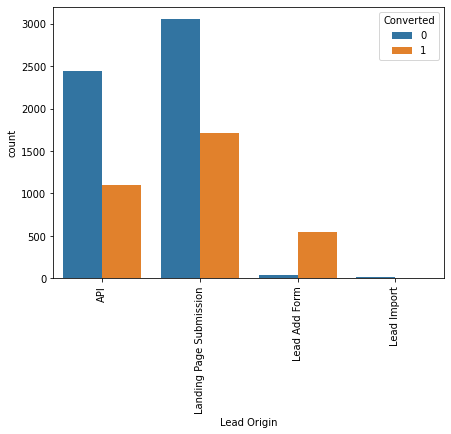

In [598]:
# Analysis of Lead Origin

count_var('Lead Origin')

Landing page submission is comparatively high than the rest of the categories, lead form has high certainty in lead conversion.

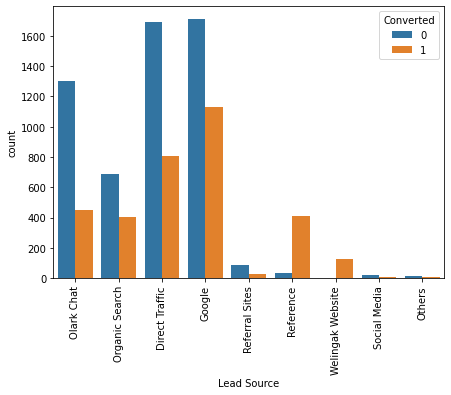

In [599]:
# Analysis of Lead Source

count_var('Lead Source')

Google is the best lead source among all categories in the lead source, Direct traffic, Olark Chat and organic search are some of the best entities in lead source.

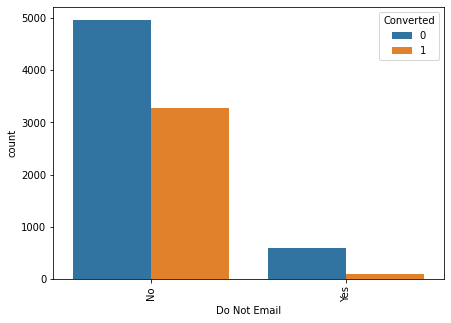

In [600]:
# Analysis of Do Not Email

count_var('Do Not Email')

Email is a preferance for people and there is a high count of conversion amongst the same.

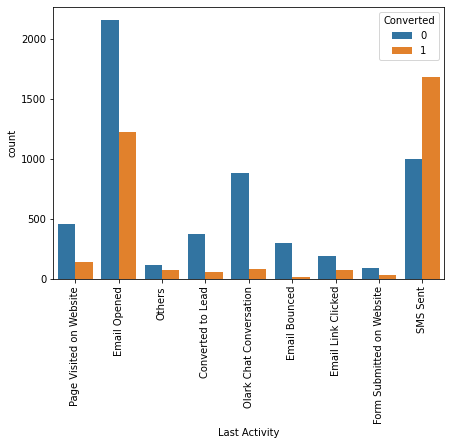

In [601]:
# Analysis of Last Activity

count_var('Last Activity')

To those whom SMSs were sent showed high count of conversion. One very encouraging feature comes out to be Email Opened. Even though conversion count for Email opened is less, it is encouraging to see people opening emails.

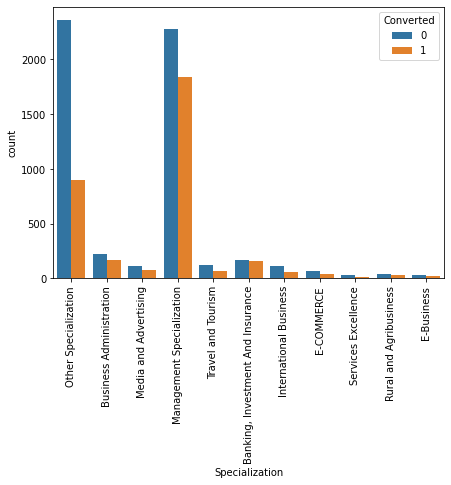

In [602]:
# Analysis of Specialization

count_var('Specialization')

Those who were converted showed a high preference for management courses.

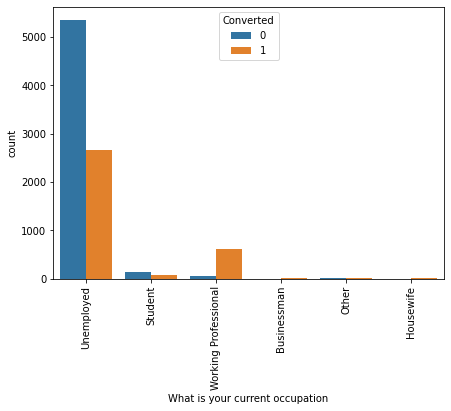

In [603]:
# Analysis of What is your current occupation

count_var('What is your current occupation')

Working professionals and Unemployed going for the course have high chances of joining the course.

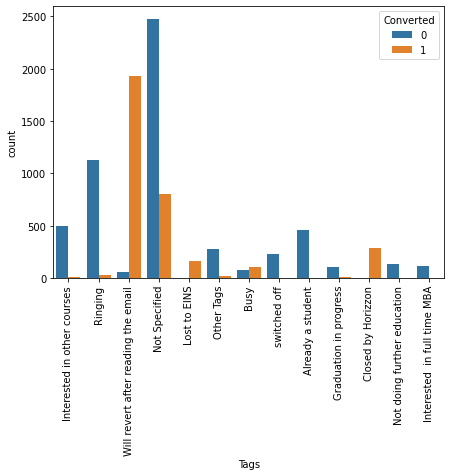

In [604]:
# Analysis of Tags

count_var('Tags')

Will revert after reading the email showed highest count for conversion.

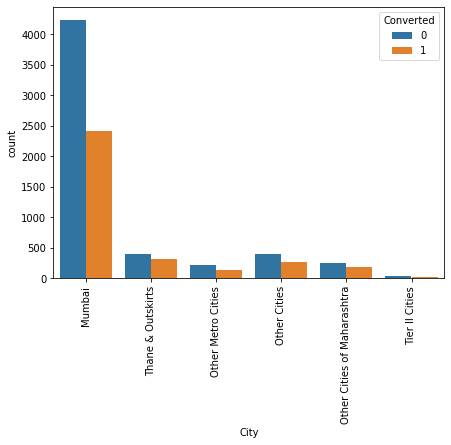

In [605]:
# Analysis of City

count_var('City')

Most leads are from Mumbai city with maximum conversion count from the same.

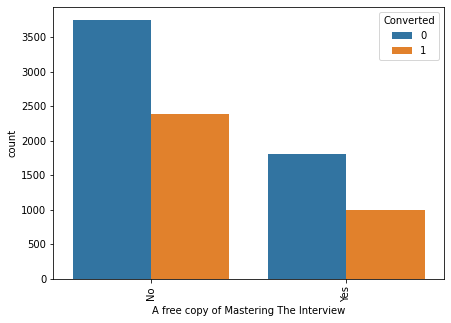

In [606]:
# Analysis of A free copy of Mastering The Interview

count_var('A free copy of Mastering The Interview')

People opted for not having a free copy of mastering the interview and the same even accounted for higher conversion count.

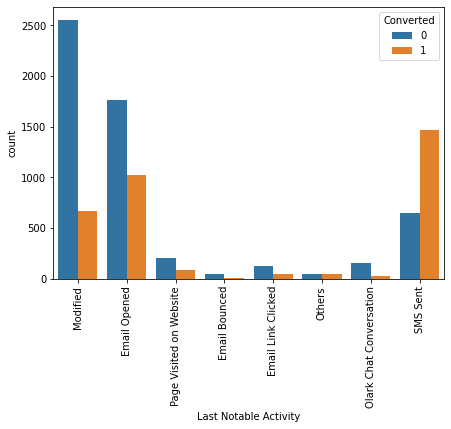

In [607]:
# Analysis of Last Notable Activity

count_var('Last Notable Activity')

SMS turns out to be the activity which has the highest conversion count.

In [608]:
# Defining custom function for univariate analysis of numerical features:

def num_var(x,y):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1,1)
    sns.distplot(leads[x], bins = y)

    plt.subplot(3,1,2)
    sns.boxplot(x = x, data = leads)

    plt.subplot(3,1,3)
    sns.violinplot(x = x, data = leads)

    plt.tight_layout()
    plt.show()

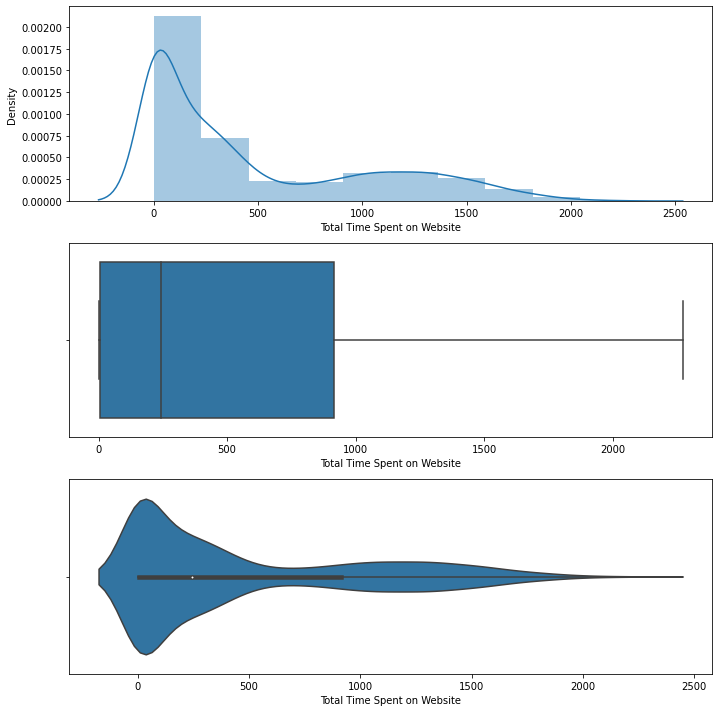

In [609]:
# Analysis of Total Time Spent on Website

num_var('Total Time Spent on Website', 10)

Maximum people are spending time between 0 to 100 minutes on the website.

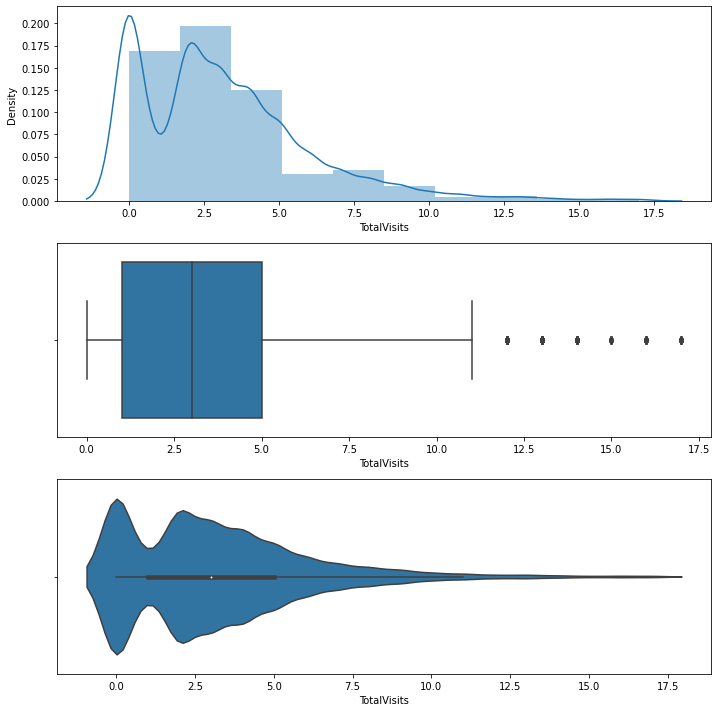

In [610]:
# Analysis of TotalVisits

num_var('TotalVisits', 10)

We see peak at 0 and 2 number of total visits of the website.

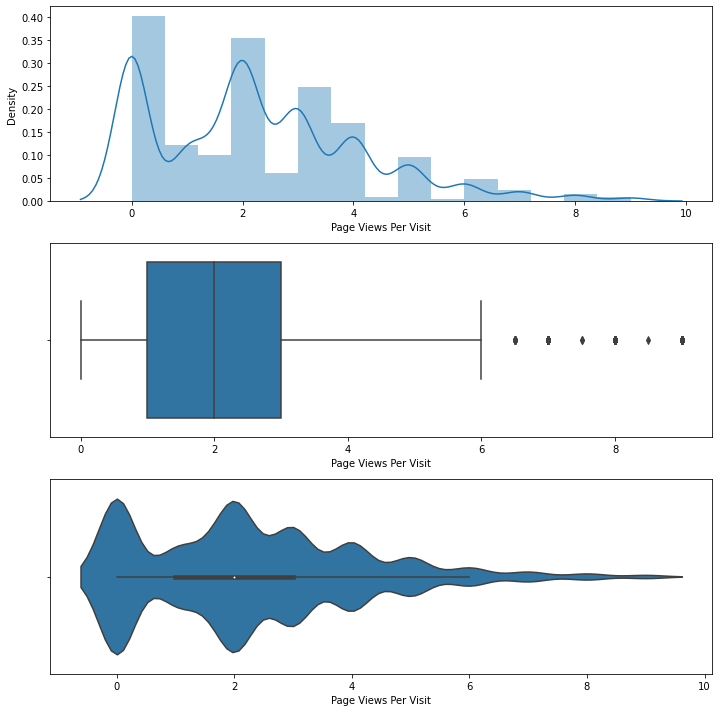

In [611]:
# Analysis of Page Views Per Visit

num_var('Page Views Per Visit', 15)

We see major peaks at 0 and 2 Page Views Per visit and minor peaks at 3, 4, and 5.

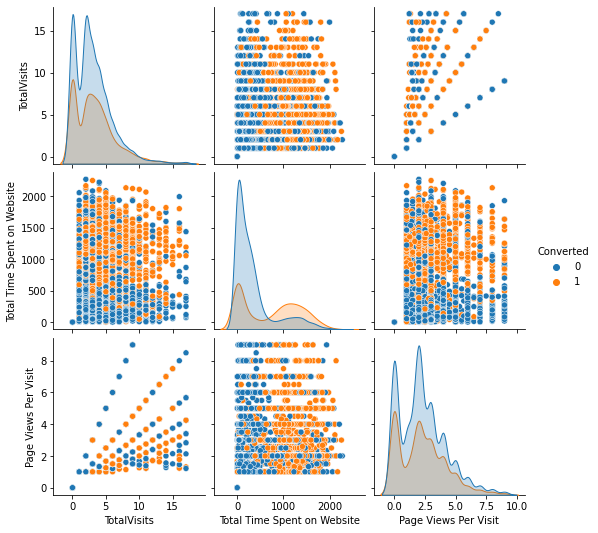

In [612]:
# Bivariate analysis of numerical features:

sns.pairplot(leads, hue = 'Converted')
plt.show()

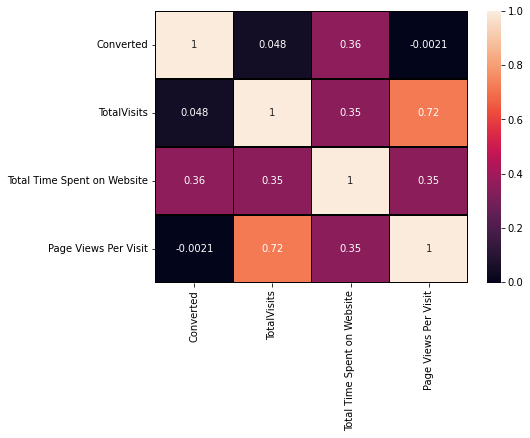

In [613]:
# Generating the Heatmap.

plt.figure(figsize = (7,5))
sns.heatmap(leads.corr(), annot = True, linewidth = 0.5, linecolor = 'black')
plt.show()

* From pair plot we can observe clearly that our dataset has highly skewed values with lot of random peaks.
* With heat map we can inference Total visits and Page view per visit has high correlation than other features. 
* Total Visits and converted has very low correlation.
* Total Visits and Total time spent on website has a reasonable correlation. 
* There is positive correlation between total time spent on website and conversion.
* There is almost no correlation in Page views per visit and total visits with conversion. 

### 5. Data Preperation - Variable Transformation

In [614]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [615]:
# Possible values of features

vars = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']

for i in leads[vars]:
    print('\n' + i)
    print('-'*30)
    print(leads[vars][i].value_counts())


Lead Origin
------------------------------
Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64

Lead Source
------------------------------
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Social Media          33
Others                20
Name: Lead Source, dtype: int64

Do Not Email
------------------------------
No     8235
Yes     689
Name: Do Not Email, dtype: int64

Converted
------------------------------
0    5555
1    3369
Name: Converted, dtype: int64

Last Activity
------------------------------
Email Opened                 3385
SMS Sent                     2678
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others           

In [616]:
# Mapping Variables with Yes/No to 1 or 0.

def binary_map(x):
    return x.map({'Yes':1, "No":0})

leads[['Do Not Email']] = leads[['Do Not Email']].apply(binary_map)
leads[['A free copy of Mastering The Interview']] = leads[['A free copy of Mastering The Interview']].apply(binary_map)

In [617]:
vars = ['Do Not Email','A free copy of Mastering The Interview']

for i in leads[vars]:
    print('\n' + i)
    print('-'*30)
    print(leads[vars][i].value_counts())


Do Not Email
------------------------------
0    8235
1     689
Name: Do Not Email, dtype: int64

A free copy of Mastering The Interview
------------------------------
0    6126
1    2798
Name: A free copy of Mastering The Interview, dtype: int64


With this we know that mapping operation was successful.

In [618]:
# Dummy Variable Transformation

object_cols = leads.select_dtypes(include = ['object']).columns
object_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [619]:
# create dummy variables


dummy = pd.get_dummies(leads['Lead Origin'], prefix = 'LO', drop_first = True)
leads = pd.concat([leads, dummy], axis =1)

dummy = pd.get_dummies(leads['Lead Source'], prefix = 'LS')
dummy = dummy.drop(['LS_Others'], axis =1)
leads = pd.concat([leads, dummy], axis =1)

dummy = pd.get_dummies(leads['Last Activity'], prefix = 'LA')
dummy = dummy.drop(['LA_Others'], axis =1)
leads = pd.concat([leads, dummy], axis =1)

dummy = pd.get_dummies(leads['Specialization'], prefix = 'S')
dummy = dummy.drop(['S_Other Specialization'], axis =1)
leads = pd.concat([leads, dummy], axis =1)

dummy = pd.get_dummies(leads['What is your current occupation'], prefix = 'CO')
dummy = dummy.drop(['CO_Other'], axis =1)
leads = pd.concat([leads, dummy], axis =1)

dummy = pd.get_dummies(leads['Tags'], prefix = 'Tags')
dummy = dummy.drop(['Tags_Other Tags'], axis =1)
leads = pd.concat([leads, dummy], axis =1)

dummy = pd.get_dummies(leads['City'], prefix = 'City')
dummy = dummy.drop(['City_Tier II Cities'], axis =1)
leads = pd.concat([leads, dummy], axis =1)

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix = 'LNA')
dummy = dummy.drop(['LNA_Others'], axis =1)
leads = pd.concat([leads, dummy], axis =1)

In [620]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Social Media,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,"S_Banking, Investment And Insurance",S_Business Administration,S_E-Business,S_E-COMMERCE,S_International Business,S_Management Specialization,S_Media and Advertising,S_Rural and Agribusiness,S_Services Excellence,S_Travel and Tourism,CO_Businessman,CO_Housewife,CO_Student,CO_Unemployed,CO_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [621]:
leads.shape

(8924, 72)

In [622]:
# Drop the Original Columns

leads.drop(object_cols, axis =1, inplace = True)
leads.shape

(8924, 64)

In [623]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              8924 non-null   int64  
 1   Converted                                 8924 non-null   int64  
 2   TotalVisits                               8924 non-null   float64
 3   Total Time Spent on Website               8924 non-null   int64  
 4   Page Views Per Visit                      8924 non-null   float64
 5   A free copy of Mastering The Interview    8924 non-null   int64  
 6   LO_Landing Page Submission                8924 non-null   uint8  
 7   LO_Lead Add Form                          8924 non-null   uint8  
 8   LO_Lead Import                            8924 non-null   uint8  
 9   LS_Direct Traffic                         8924 non-null   uint8  
 10  LS_Google                           

### 6. Train-Test Split

In [624]:
# import sklearn library.

import sklearn
from sklearn.model_selection import train_test_split

In [625]:
# Let variable X represent features of leads and Converted
# Let variable Y represent Converted

y = leads.pop('Converted')
y[:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: Converted, dtype: int64

In [626]:
X = leads
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Social Media,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,"S_Banking, Investment And Insurance",S_Business Administration,S_E-Business,S_E-COMMERCE,S_International Business,S_Management Specialization,S_Media and Advertising,S_Rural and Agribusiness,S_Services Excellence,S_Travel and Tourism,CO_Businessman,CO_Housewife,CO_Student,CO_Unemployed,CO_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [627]:
# Splitting the data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

### 7. Feature Scaling

In [628]:
from sklearn.preprocessing import StandardScaler

In [629]:
standardscaler = StandardScaler()

In [630]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Do Not Email,6246.0,0.075408,0.264070,0.0,0.0,0.0,0.00,1.0
TotalVisits,6246.0,3.142811,2.877388,0.0,1.0,3.0,5.00,17.0
Total Time Spent on Website,6246.0,481.673071,548.402857,0.0,7.0,242.5,919.75,2272.0
Page Views Per Visit,6246.0,2.256233,1.881729,0.0,1.0,2.0,3.00,9.0
A free copy of Mastering The Interview,6246.0,0.309318,0.462249,0.0,0.0,0.0,1.00,1.0
LO_Landing Page Submission,6246.0,0.528498,0.499227,0.0,0.0,1.0,1.00,1.0
LO_Lead Add Form,6246.0,0.063401,0.243702,0.0,0.0,0.0,0.00,1.0
LO_Lead Import,6246.0,0.003522,0.059249,0.0,0.0,0.0,0.00,1.0
LS_Direct Traffic,6246.0,0.275376,0.446739,0.0,0.0,0.0,1.00,1.0
LS_Google,6246.0,0.322126,0.467328,0.0,0.0,0.0,1.00,1.0


In [631]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'LO_Landing Page Submission', 'LO_Lead Add Form', 'LO_Lead Import',
       'LS_Direct Traffic', 'LS_Google', 'LS_Olark Chat', 'LS_Organic Search',
       'LS_Reference', 'LS_Referral Sites', 'LS_Social Media',
       'LS_Welingak Website', 'LA_Converted to Lead', 'LA_Email Bounced',
       'LA_Email Link Clicked', 'LA_Email Opened',
       'LA_Form Submitted on Website', 'LA_Olark Chat Conversation',
       'LA_Page Visited on Website', 'LA_SMS Sent',
       'S_Banking, Investment And Insurance', 'S_Business Administration',
       'S_E-Business', 'S_E-COMMERCE', 'S_International Business',
       'S_Management Specialization', 'S_Media and Advertising',
       'S_Rural and Agribusiness', 'S_Services Excellence',
       'S_Travel and Tourism', 'CO_Businessman', 'CO_Housewife', 'CO_Student',
       'CO_Unemployed', 'CO_Working Professional'

In [632]:
# standardize numerical features of the X_train dataset.

X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = standardscaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

In [633]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Do Not Email,6246.0,7.540826e-02,0.264070,0.000000,0.000000,0.000000,0.000000,1.000000
TotalVisits,6246.0,1.137596e-17,1.000080,-1.092332,-0.744767,-0.049636,0.645494,4.816277
Total Time Spent on Website,6246.0,-2.275193e-18,1.000080,-0.878390,-0.865625,-0.436162,0.798887,3.264881
Page Views Per Visit,6246.0,-4.891665e-17,1.000080,-1.199117,-0.667648,-0.136180,0.395289,3.584101
A free copy of Mastering The Interview,6246.0,3.093180e-01,0.462249,0.000000,0.000000,0.000000,1.000000,1.000000
LO_Landing Page Submission,6246.0,5.284982e-01,0.499227,0.000000,0.000000,1.000000,1.000000,1.000000
LO_Lead Add Form,6246.0,6.340058e-02,0.243702,0.000000,0.000000,0.000000,0.000000,1.000000
LO_Lead Import,6246.0,3.522254e-03,0.059249,0.000000,0.000000,0.000000,0.000000,1.000000
LS_Direct Traffic,6246.0,2.753762e-01,0.446739,0.000000,0.000000,0.000000,1.000000,1.000000
LS_Google,6246.0,3.221262e-01,0.467328,0.000000,0.000000,0.000000,1.000000,1.000000


### 8. Model Building

In [634]:
# Importing Statsmodels library
import statsmodels.api as sm

In [635]:
# Building first Logistic Regression Model

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6182
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1172.5
Date:                Tue, 03 Jan 2023   Deviance:                       2345.0
Time:                        10:56:15   Pearson chi2:                 1.32e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0381      2.419     -0.429      0.668      -5.780       3.704
Do Not Email                                -0.8354      0.311     -2.690      0.007      -1.444      -0.227
TotalVisits                                  0.2583      0.080      3.239      0.001       0.102       0.415
Total Time Spent on Website                  1.0857      0.064     16.894      0.000       0.960       1.212
Page Views Per Visit                        -0.2908      0.095     -3.048      0.002      -0.478      -0.104
A free copy of Mastering The Interview      -0.1500      0.185     -0.811      0.417      -0.512       0.212
LO_Landing Page Submission                  -0.6271      0.238     -2.636      0.008      -1.093      -0.161
LO_Lead Add Form                             0.5443      1.589      0.342      0.732      -2.570       3.659
LO_Lead Import                              24.6283   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
LS_Direct Traffic                            0.2320      1.540      0.151      0.880      -2.787       3.250
LS_Google                                    0.3499      1.533      0.228      0.819      -2.654       3.354
LS_Olark Chat                                1.0963      1.540      0.712      0.477      -1.923       4.116
LS_Organic Search                            0.2011      1.542      0.130      0.896      -2.821       3.223
LS_Reference                                 0.8901      1.653      0.539      0.590      -2.349       4.130
LS_Referral Sites                           -0.1368      1.607     -0.085      0.932      -3.286       3.012
LS_Social Media                            -23.8366   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
LS_Welingak Website                          4.6227      1.762      2.623      0.009       1.169       8.077
LA_Converted to Lead                        -1.2694      0.829     -1.532      0.126      -2.894       0.355
LA_Email Bounced                            -1.8216      1.083     -1.683      0.092      -3.943       0.300
LA_Email Link Clicked                       -0.2903      0.964     -0.301      0.763      -2.180       1.599
LA_Email Opened                             -0.3377      0.790     -0.427      0.669      -1.886       1.211
LA_Form Submitted on Website                -0.2323      0.921     -0.252      0.801      -2.037       1.573
LA_Olark Chat Conversation                  -1.4310      0.799     -1.791      0.073      -2.997       0.135
LA_Page Visited on Website                  -1.1587      0.847     -1.368      0.171      -2.818       0.501
LA_SMS Sent                                  0.6217      0.776      0.802      0.423      -0.898       2.142
S_Banking, Investment And Insur

### 9. Feature Selection using RFE

In [636]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [637]:
# RFE for automatic feature selection

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [638]:
# Checking on the support values

rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False])

In [639]:
# Listing down various ranks and support values for each feature

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 41),
 ('LO_Landing Page Submission', False, 9),
 ('LO_Lead Add Form', True, 1),
 ('LO_Lead Import', False, 19),
 ('LS_Direct Traffic', False, 30),
 ('LS_Google', False, 32),
 ('LS_Olark Chat', True, 1),
 ('LS_Organic Search', False, 31),
 ('LS_Reference', False, 29),
 ('LS_Referral Sites', False, 20),
 ('LS_Social Media', False, 28),
 ('LS_Welingak Website', True, 1),
 ('LA_Converted to Lead', False, 10),
 ('LA_Email Bounced', False, 11),
 ('LA_Email Link Clicked', False, 37),
 ('LA_Email Opened', False, 48),
 ('LA_Form Submitted on Website', False, 49),
 ('LA_Olark Chat Conversation', False, 8),
 ('LA_Page Visited on Website', False, 12),
 ('LA_SMS Sent', True, 1),
 ('S_Banking, Investment And Insurance', False, 46),
 ('S_Business Administration', False, 33),
 ('S_E-Business', False, 22),
 ('S_E-CO

In [640]:
# columns where rfe.support = True

col = X_train.columns[rfe.support_]

In [641]:
col

Index(['Total Time Spent on Website', 'LO_Lead Add Form', 'LS_Olark Chat',
       'LS_Welingak Website', 'LA_SMS Sent', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'LNA_Modified', 'LNA_Olark Chat Conversation'],
      dtype='object')

In [642]:
# Subsetting our training dataset basis the selected columns

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'LO_Landing Page Submission',
       'LO_Lead Import', 'LS_Direct Traffic', 'LS_Google', 'LS_Organic Search',
       'LS_Reference', 'LS_Referral Sites', 'LS_Social Media',
       'LA_Converted to Lead', 'LA_Email Bounced', 'LA_Email Link Clicked',
       'LA_Email Opened', 'LA_Form Submitted on Website',
       'LA_Olark Chat Conversation', 'LA_Page Visited on Website',
       'S_Banking, Investment And Insurance', 'S_Business Administration',
       'S_E-Business', 'S_E-COMMERCE', 'S_International Business',
       'S_Management Specialization', 'S_Media and Advertising',
       'S_Rural and Agribusiness', 'S_Services Excellence',
       'S_Travel and Tourism', 'CO_Businessman', 'CO_Housewife', 'CO_Student',
       'CO_Unemployed', 'CO_Working Professional',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 

#### Assessing Models using StatsModels

In [643]:
# Creating second Logistic Regression Model based on features basis RFE:

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1236.1
Date:                Tue, 03 Jan 2023   Deviance:                       2472.3
Time:                        10:56:22   Pearson chi2:                 8.86e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.5312      0.222    -15.925      0.000      -3.966      -3.097
Total Time Spent on Website                  1.0779      0.061     17.634      0.000       0.958       1.198
LO_Lead Add Form                             1.7357      0.421      4.127      0.000       0.911       2.560
LS_Olark Chat                                1.3026      0.145      8.998      0.000       1.019       1.586
LS_Welingak Website                          3.5853      0.849      4.223      0.000       1.921       5.249
LA_SMS Sent                                  1.9855      0.117     17.005      0.000       1.757       2.214
Tags_Already a student                      -1.2401      0.635     -1.952      0.051      -2.485       0.005
Tags_Busy                                    2.6859      0.307      8.737      0.000       2.083       3.288
Tags_Closed by Horizzon                      8.5865      0.765     11.220      0.000       7.087      10.086
Tags_Lost to EINS                            7.4777      0.572     13.072      0.000       6.357       8.599
Tags_Not Specified                           1.9071      0.219      8.697      0.000       1.477       2.337
Tags_Ringing                                -1.6067      0.316     -5.078      0.000      -2.227      -0.987
Tags_Will revert after reading the email     6.4811      0.277     23.406      0.000       5.938       7.024
Tags_switched off                           -2.2534      0.769     -2.929      0.003      -3.761      -0.746
LNA_Modified                                -1.7770      0.127    -13.969      0.000      -2.026      -1.528
LNA_Olark Chat Conversation                 -1.8176      0.422     -4.303      0.000      -2.646      -0.990
============================================================================================================
"""

#### Checking VIF values

In [644]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [645]:
# Creating a dataframe that would contain all the features and their respective VIFs values

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
1,LO_Lead Add Form,1.77
9,Tags_Not Specified,1.69
11,Tags_Will revert after reading the email,1.66
4,LA_SMS Sent,1.65
2,LS_Olark Chat,1.64
13,LNA_Modified,1.49
0,Total Time Spent on Website,1.46
3,LS_Welingak Website,1.32
7,Tags_Closed by Horizzon,1.21
10,Tags_Ringing,1.12


In [646]:
# Since p-value of 'Tags_ALready a student' is high, this signifies that the coefficient is not significant and hence we drop the variable.

col = col.drop('Tags_Already a student', 1)

In [647]:
# Re-run our model again.

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.6
Date:                Tue, 03 Jan 2023   Deviance:                       2477.3
Time:                        10:56:22   Pearson chi2:                 8.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7490      0.208    -18.040      0.000      -4.156      -3.342
Total Time Spent on Website                  1.0712      0.061     17.622      0.000       0.952       1.190
LO_Lead Add Form                             1.7479      0.424      4.118      0.000       0.916       2.580
LS_Olark Chat                                1.2885      0.144      8.927      0.000       1.006       1.571
LS_Welingak Website                          3.5634      0.851      4.187      0.000       1.895       5.231
LA_SMS Sent                                  2.0096      0.117     17.214      0.000       1.781       2.238
Tags_Busy                                    2.8922      0.299      9.664      0.000       2.306       3.479
Tags_Closed by Horizzon                      8.7931      0.762     11.538      0.000       7.299      10.287
Tags_Lost to EINS                            7.6899      0.567     13.554      0.000       6.578       8.802
Tags_Not Specified                           2.1195      0.206     10.277      0.000       1.715       2.524
Tags_Ringing                                -1.4025      0.308     -4.548      0.000      -2.007      -0.798
Tags_Will revert after reading the email     6.6925      0.267     25.053      0.000       6.169       7.216
Tags_switched off                           -2.0495      0.766     -2.676      0.007      -3.550      -0.549
LNA_Modified                                -1.7700      0.127    -13.908      0.000      -2.019      -1.521
LNA_Olark Chat Conversation                 -1.8100      0.421     -4.295      0.000      -2.636      -0.984
============================================================================================================
"""

In [648]:
# Creating a dataframe that would contain all the features and their respective VIFs values.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values , i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,LO_Lead Add Form,1.77
10,Tags_Will revert after reading the email,1.66
4,LA_SMS Sent,1.65
8,Tags_Not Specified,1.65
2,LS_Olark Chat,1.62
0,Total Time Spent on Website,1.46
12,LNA_Modified,1.42
3,LS_Welingak Website,1.32
6,Tags_Closed by Horizzon,1.21
9,Tags_Ringing,1.12


In [649]:
# Our model is good to go since all the p-values are tending to 0 and all the VIF values are less than 2.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.988324
6138    0.996338
8650    0.985313
3423    0.045137
6552    0.217223
1696    0.442953
2110    0.986077
6830    0.728029
2581    0.008327
5927    0.079488
dtype: float64

In [650]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98832412, 0.99633811, 0.98531338, 0.04513653, 0.21722286,
       0.44295307, 0.98607666, 0.72802867, 0.00832654, 0.07948802])

#### Creating a dataframe with the converted values and predicted probabilities

In [651]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['StudentID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,StudentID
0,1,0.988324,6676
1,1,0.996338,6138
2,1,0.985313,8650
3,0,0.045137,3423
4,0,0.217223,6552


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [652]:
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,StudentID,Predicted
0,1,0.988324,6676,1
1,1,0.996338,6138,1
2,1,0.985313,8650,1
3,0,0.045137,3423,0
4,0,0.217223,6552,0


In [653]:
# import metrics and confusion matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [654]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3705  166]
 [ 287 2088]]


In [655]:
# The overall accuracy

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.9274735830931796


#### Looking at other metrics

In [656]:
TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

In [657]:
# Sensitivity = Recall = True Positive Rate

Recall = TP/float(TP+FN)
print(Recall)

0.8791578947368421


In [658]:
# Specificity = True Negative Rate

print(TN/float(TN+FP))

0.9571170240247998


In [659]:
# False Positive Rate [1-specificity]

print(FP/float(FP+TN))

0.04288297597520021


In [660]:
# False Negative Rate

print(FN/float(FN+TP))

0.12084210526315789


In [661]:
# Precision

Precision = TP/float(TP+FP)
print(Precision)

0.9263531499556344


In [662]:
# Fscore

F_score = (2)*(Recall * Precision)/(Recall + Precision)
print(F_score)

0.9021386908619573


In [663]:
# Define the function to plot the ROC curve.

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.plot(fpr, tpr, label = 'ROC Curve (area= {} )'.format(round(auc_score,2)))
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negatie Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receivver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

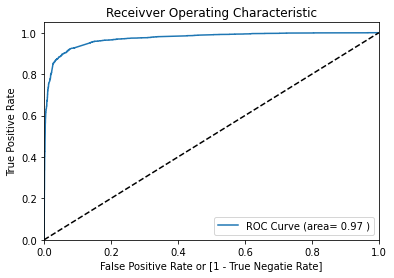

In [664]:
draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Conversion_Prob'])

### Step 10. Finding Optimum Cut-off Point

In [665]:
# Create column with dfferent probability cutoffs.

number = [float(x)/10 for x in range(11)]

for i in number:
    y_train_pred_final[i] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,StudentID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,1,0.988324,6676,1,1,1,1,1,1,1,1,1,1,1,0
1,1,0.996338,6138,1,1,1,1,1,1,1,1,1,1,1,0
2,1,0.985313,8650,1,1,1,1,1,1,1,1,1,1,1,0
3,0,0.045137,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.217223,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [666]:
# Calculate accuracy, sensitivity, specificty for various probabilities.

cutoff_df = pd.DataFrame(columns = ['Prob', 'Accuracy', 'Sensitivity', 'Specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/10 for x in range(11)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.380243     1.000000     0.000000
0.1   0.1  0.839097     0.971368     0.757944
0.2   0.2  0.895613     0.952421     0.860759
0.3   0.3  0.923151     0.915789     0.927667
0.4   0.4  0.925392     0.900632     0.940584
0.5   0.5  0.927474     0.879158     0.957117
0.6   0.6  0.926833     0.858526     0.968742
0.7   0.7  0.911784     0.803368     0.978300
0.8   0.8  0.902017     0.770105     0.982950
0.9   0.9  0.882965     0.709474     0.989408
1.0   1.0  0.619757     0.000000     1.000000


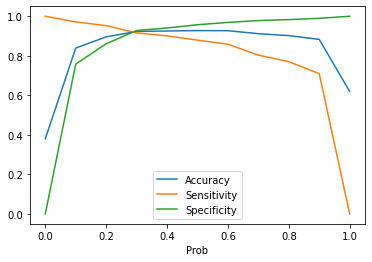

In [667]:
# Plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [668]:
# Create final predicted column based on 0.3 as the cut-off probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,StudentID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,final_predicted
0,1,0.988324,6676,1,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.996338,6138,1,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.985313,8650,1,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.045137,3423,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.217223,6552,0,1,1,1,0,0,0,0,0,0,0,0,0


In [669]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion)

[[3591  280]
 [ 200 2175]]


In [670]:
# The overall accuracy

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

0.9231508165225745


#### Looking at other metrics

In [671]:
TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

In [672]:
# Sensitivity = Recall = True Positive Rate

Recall = TP/float(TP+FN)
print(Recall)

0.9157894736842105


In [673]:
# Specificity = True Negative Rate

print(TN/float(TN+FP))

0.9276672694394213


In [674]:
# False Positive Rate [1-specificity]

print(FP/float(FP+TN))

0.07233273056057866


In [675]:
# False Negative Rate

print(FN/float(FN+TP))

0.08421052631578947


In [676]:
# Precision

Precision = TP/float(TP+FP)
print(Precision)

0.8859470468431772


In [677]:
F_score = (2)*(Recall * Precision)/(Recall + Precision)
print(F_score)

0.9006211180124224


#### Precision and recall tradeoff

In [678]:
# Plot Precision and recall trade-off plot.

from sklearn.metrics import precision_recall_curve

In [679]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

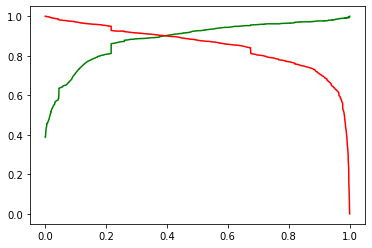

In [680]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 11. Making Predictions on the test set

In [681]:
# Standardizing numerical variables of X Test_Datset

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = standardscaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [682]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,LO_Lead Add Form,LS_Olark Chat,LS_Welingak Website,LA_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,LNA_Modified,LNA_Olark Chat Conversation
7625,2.077703,0,0,0,0,0,0,0,0,0,0,0,0,0
5207,0.739164,0,0,0,0,0,0,0,0,0,1,0,0,0
2390,-0.878390,1,0,0,1,0,0,0,0,0,1,0,0,0
4362,-0.455310,0,0,0,1,0,0,0,0,1,0,0,0,0
1023,-0.300302,0,0,0,0,0,0,0,0,0,0,0,0,0


In [683]:
X_test_sm = sm.add_constant(X_test)

In [684]:
y_test_pred = res.predict(X_test_sm)

In [685]:
# First 10 values.

y_test_pred[:10]

7625    0.178961
5207    0.976689
2390    0.996859
4362    0.025840
1023    0.016779
8226    0.989213
3079    0.131618
530     0.018118
7873    0.045137
5146    0.997848
dtype: float64

In [686]:
# Reshaping y_test_pred_values:

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.17896082, 0.97668887, 0.9968587 , 0.02583958, 0.01677865,
       0.98921311, 0.13161836, 0.01811759, 0.04513653, 0.99784843])

In [687]:
# Creating a dataframe to store StudentID, Converted, Conversion_prob and final_predicted

y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_prob':y_test_pred})
y_test_pred_final['StudentID'] = y_test.index
y_test_pred_final = y_test_pred_final.reindex(['StudentID', 'Converted', 'Conversion_prob'], axis =1) 
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head()

,StudentID,Converted,Conversion_prob,final_predicted
0,7625,0,0.178961,0
1,5207,1,0.976689,1
2,2390,1,0.996859,1
3,4362,0,0.025840,0
4,1023,0,0.016779,0


In [688]:
# Adding Lead Score Column as per buisness requirement

y_test_pred_final['Lead Score'] = y_test_pred_final['Conversion_prob']*100
y_test_pred_final.head()

,StudentID,Converted,Conversion_prob,final_predicted,Lead Score
0,7625,0,0.178961,0,17.896082
1,5207,1,0.976689,1,97.668887
2,2390,1,0.996859,1,99.685870
3,4362,0,0.025840,0,2.583958
4,1023,0,0.016779,0,1.677865


In [689]:
# Sort the leads by lead score to enable the team to close hot leads as per the lead score.

y_test_pred_final.sort_values(by ='Lead Score',ascending = False, inplace = True)
y_test_pred_final.head()

,StudentID,Converted,Conversion_prob,final_predicted,Lead Score
779,4062,1,0.999974,1,99.997423
326,3339,1,0.999936,1,99.993584
2582,8103,1,0.999918,1,99.991847
218,6028,1,0.999860,1,99.986017
1936,2354,1,0.999807,1,99.980666


In [690]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['final_predicted'])
print(confusion)

[[1559  125]
 [  82  912]]


In [691]:
TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

In [692]:
# Sensitivity = Recall = True Positive Rate

Recall = TP/float(TP+FN)
print(Recall)

0.9175050301810865


In [693]:
# Specificity = True Negative Rate

TN/float(TN+FP)

0.9257719714964371

In [694]:
# False Positive Rate

FP/float(FP+TN)

0.07422802850356294

In [695]:
# False Negative Rate

FN/float(FN+TP)

0.08249496981891348

In [696]:
# Precision

Precision = TP/float(TP+FP)
print(Precision)

0.8794599807135969


In [697]:
F_score = (2)*(Recall * Precision)/(Recall + Precision)
print(F_score)

0.8980797636632201


### 12. Factors Influencing the Model

In [698]:
# Creating a dataframe to store the coefficients of all features.

features = res.params[1:]
features = pd.DataFrame(features)
features

,0
Total Time Spent on Website,1.071202
LO_Lead Add Form,1.747894
LS_Olark Chat,1.288515
LS_Welingak Website,3.563403
LA_SMS Sent,2.009567
Tags_Busy,2.892155
Tags_Closed by Horizzon,8.793084
Tags_Lost to EINS,7.689944
Tags_Not Specified,2.119538
Tags_Ringing,-1.402464


In [699]:
# Re-setting index.

features = features.reset_index()

In [700]:
# Creating a significance column which we have derived from dividing all the coefficients by the max coefficient value.

features.columns = ['Features', 'Coeffs']
features['Significance'] = 100*(features['Coeffs']/(features['Coeffs'].max()))
features

,Features,Coeffs,Significance
0,Total Time Spent on Website,1.071202,12.182324
1,LO_Lead Add Form,1.747894,19.878054
2,LS_Olark Chat,1.288515,14.653728
3,LS_Welingak Website,3.563403,40.525065
4,LA_SMS Sent,2.009567,22.853945
5,Tags_Busy,2.892155,32.891254
6,Tags_Closed by Horizzon,8.793084,100.000000
7,Tags_Lost to EINS,7.689944,87.454457
8,Tags_Not Specified,2.119538,24.104599
9,Tags_Ringing,-1.402464,-15.949623


In [701]:
# Sort by Significance value.

features = features.sort_values(by = 'Significance', ascending = False)
features

,Features,Coeffs,Significance
6,Tags_Closed by Horizzon,8.793084,100.000000
7,Tags_Lost to EINS,7.689944,87.454457
10,Tags_Will revert after reading the email,6.692487,76.110807
3,LS_Welingak Website,3.563403,40.525065
5,Tags_Busy,2.892155,32.891254
8,Tags_Not Specified,2.119538,24.104599
4,LA_SMS Sent,2.009567,22.853945
1,LO_Lead Add Form,1.747894,19.878054
2,LS_Olark Chat,1.288515,14.653728
0,Total Time Spent on Website,1.071202,12.182324


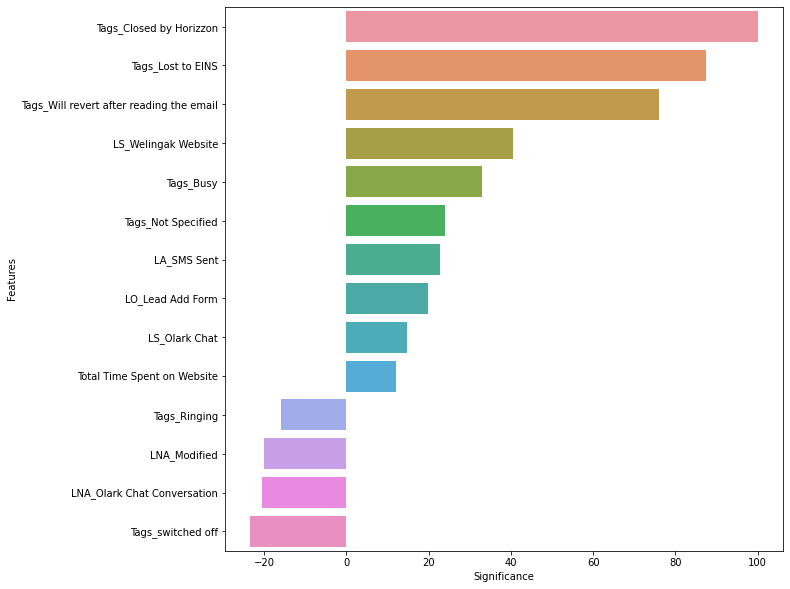

In [702]:
# Create a barplot to visualise significance of individual features.

plt.figure(figsize = (10,10))
sns.barplot('Significance', 'Features', data = features)
plt.show()

### 13. Conclusion and Recommendation

#### Metrics

##### Train Dataset

* Sensitivity/Recall/True Positive Rate: 0.9157
* Specificity = True Negative Rate: 0.9276
* False Positive Rate [1-specificity]:0.0723
* False Negative Rate: 0.0842
* Precision: 0.8859
* F-Score: 0.9006

##### Test Dataset

* Sensitivity/Recall/True Positive Rate: 0.9175
* Specificity = True Negative Rate: 0.9257
* False Positive Rate [1-specificity]: 0.0742
* False Negative Rate: 0.0824
* Precision: 0.8794
* F-Score: 0.8980

#### As per the above diagram, the top 3 variables that contribute most towards the probability of a lead getting converted are:

* Tags_Closed by Horizzon
* Tags_Lost to EINS
* Tags_will revert after reading the email

#### As per the above diagram, the bottom 3 variables that contribute most towards the probability of a lead getting converted are:

* Tags_switched off
* LNA_Olark Chat Conversation
* LNA_Modified

#### X education company needs to focus on following key aspects to improve overall conversion rate:

* Focus on the top 3 tags which are very positive for business.
* Focus on working professional who have high conversion rate. 
* Increase user engagement on wellingak website since it helps higher conversion.
* Improving lead add form also improves lead conversion with high certainty 
